In [1]:
import numpy as np

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

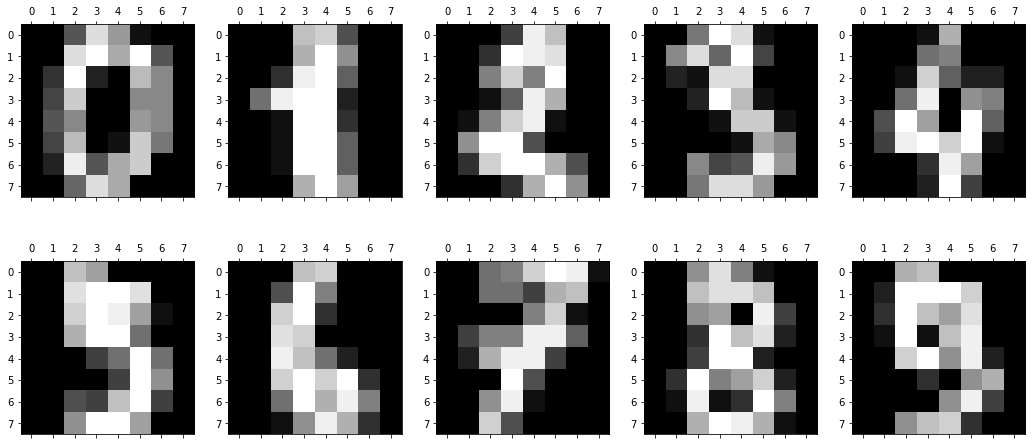

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [7]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.
/Users/ticonweb/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1797,) (1797, 10)


## Define Activation

### Sigmoid

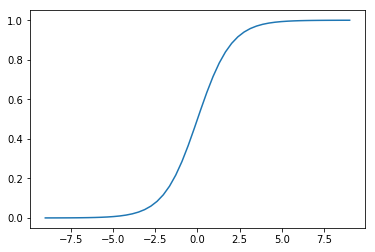

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

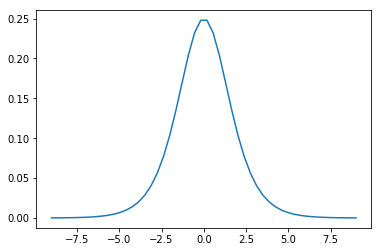

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Build a Model

### Stochastic Gradient Descent

In [34]:
from time import time

num_epoch = 300
learning_rate = 0.0001

errors_sgd = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_sgd.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    dw2 = a1.T.dot(d2)
    w2 = w2 - learning_rate * dw2

    dw1 = X.T.dot(d1)
    w1 = w1 - learning_rate * dw1

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.89816
 30 error = 0.07846
 60 error = 0.04619
 90 error = 0.02838
120 error = 0.02393
150 error = 0.02226
180 error = 0.01836
210 error = 0.01669
240 error = 0.01336
270 error = 0.01224
----------------------------------------
299 error = 0.00835


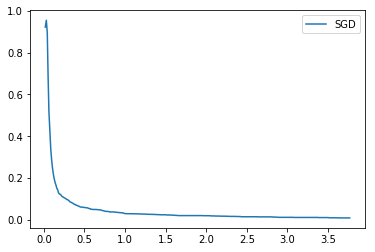

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

errors_sgd = pd.DataFrame(errors_sgd)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")

plt.legend()

## Momentum

In [12]:
from time import time

num_epoch = 300
learning_rate = 0.0001
mu = 0.9

errors_momentum = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))


dw1 = 0
dw2 = 0

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_momentum.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    
    # mu 에 이전의 dw2 를 곱하기
    dw2 = mu * dw2 + learning_rate * a1.T.dot(d2)
    w2 = w2 - dw2

    dw1 = mu * dw1 + learning_rate * X.T.dot(d1)
    w1 = w1 - dw1

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.89872
 30 error = 0.05120
 60 error = 0.00946
 90 error = 0.00556
120 error = 0.00223
150 error = 0.00223
180 error = 0.00223
210 error = 0.00167
240 error = 0.00167
270 error = 0.00111
----------------------------------------
299 error = 0.00111


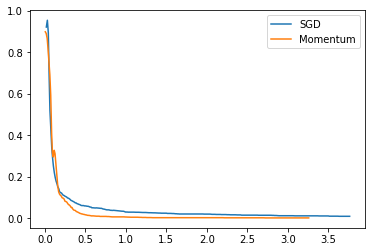

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

errors_sgd = pd.DataFrame(errors_sgd)
errors_momentum = pd.DataFrame(errors_momentum)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="Momentum")

plt.legend()

## Nesterov Momentum

속도는 비교적 느리지만 global 을 추월할 일은 적다.

In [18]:
from time import time

num_epoch = 300
learning_rate = 0.0001
mu = 0.9

errors_nesterov = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))


dw1 = 0
dw1_prev = 0
dw2 = 0
dw2_prev = 0

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_nesterov.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    
    # mu 에 이전의 dw2 를 곱하기
    dw2_prev = dw2
    dw2 = mu * dw2 - learning_rate * a1.T.dot(d2)
    w2 = w2 + (-mu * dw2_prev) + (1 + mu) * dw2

    dw1 = mu * dw1 - learning_rate * X.T.dot(d1)
    w1 = w1 + (-mu * dw1_prev) + (1 + mu) * dw1

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.89761
 30 error = 0.06233
 60 error = 0.01447
 90 error = 0.00668
120 error = 0.00501
150 error = 0.00390
180 error = 0.00390
210 error = 0.00278
240 error = 0.00278
270 error = 0.00278
----------------------------------------
299 error = 0.00278


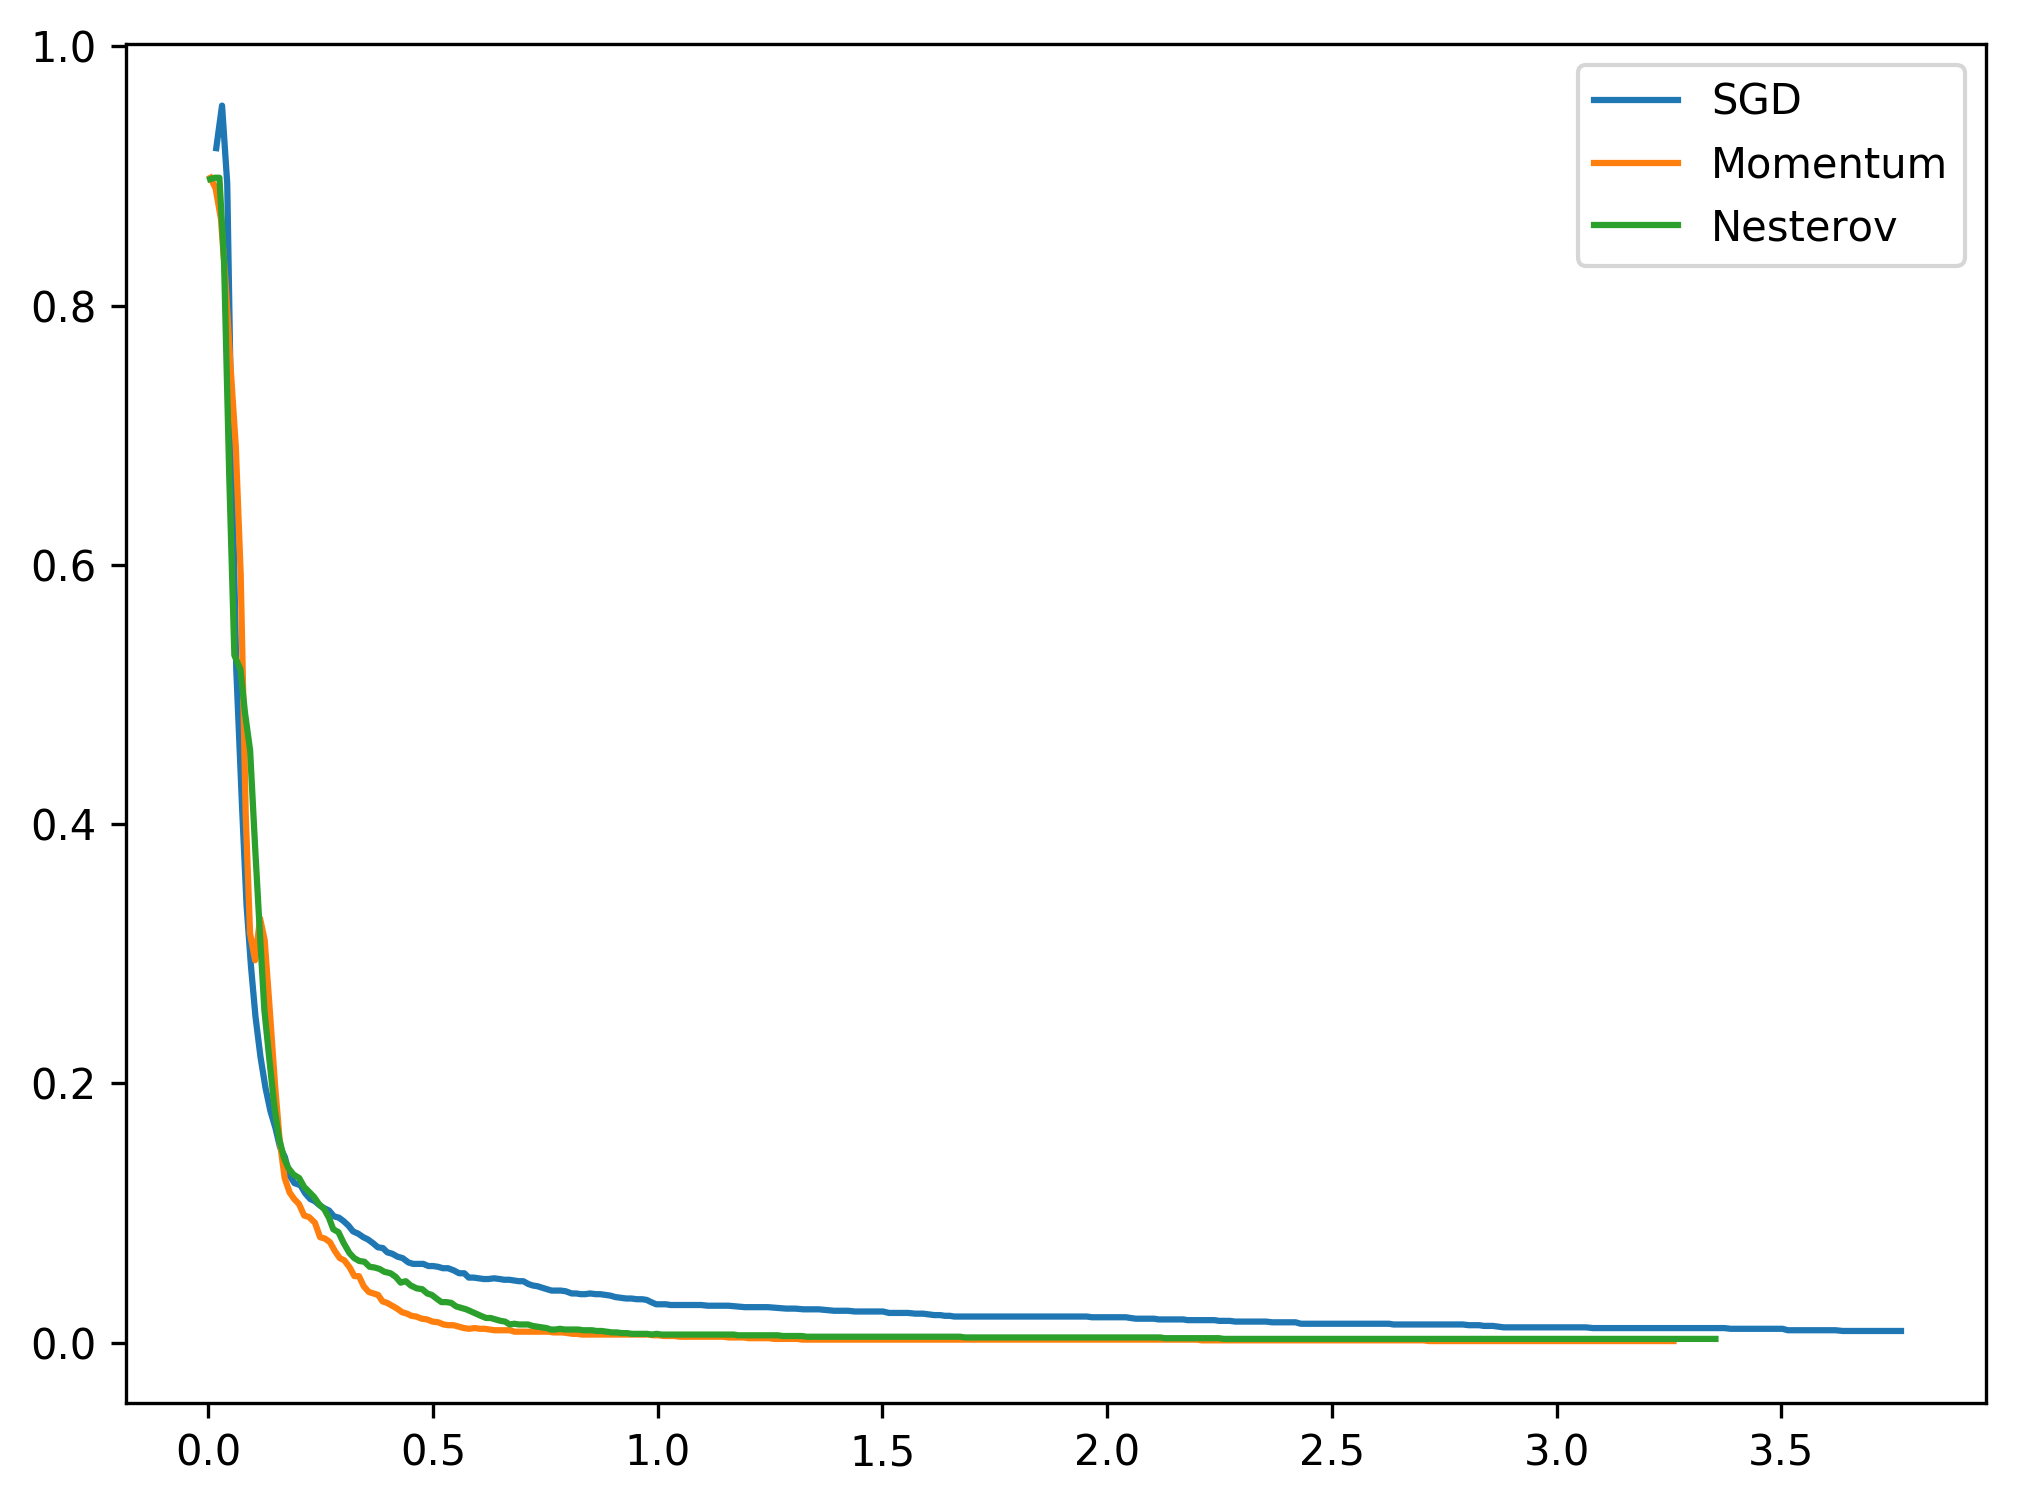

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

errors_sgd = pd.DataFrame(errors_sgd)
errors_momentum = pd.DataFrame(errors_momentum)
errors_nesterov = pd.DataFrame(errors_nesterov)

plt.figure(num=None, figsize=(8, 6), dpi=300)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="Momentum")
plt.plot(errors_nesterov['elapsed'],
         errors_nesterov['error'],
         label="Nesterov")

plt.legend()

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

## AdaGrad

In [37]:
from time import time

num_epoch = 300
learning_rate = 0.01

errors_adagrad = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))

dw1 = 0
dw2 = 0

dw1_cache = 0
dw2_cache = 0

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_adagrad.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    dw2 = a1.T.dot(d2)
    dw2_cache = dw2_cache + (dw2 ** 2)
    w2 = w2 - learning_rate * dw2 / np.sqrt(dw2_cache + 0.000001) # 0 은 나눌 수 없기 때문에 0.000001 을 더해준다.

    dw1 = X.T.dot(d1)
    dw1_cache = dw1_cache + (dw1 ** 2)
    w1 = w1 - learning_rate * dw1 / np.sqrt(dw1_cache + 0.000001)

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.98664
 30 error = 0.07679
 60 error = 0.05064
 90 error = 0.03617
120 error = 0.02727
150 error = 0.02226
180 error = 0.02170
210 error = 0.01836
240 error = 0.01669
270 error = 0.01558
----------------------------------------
299 error = 0.01391


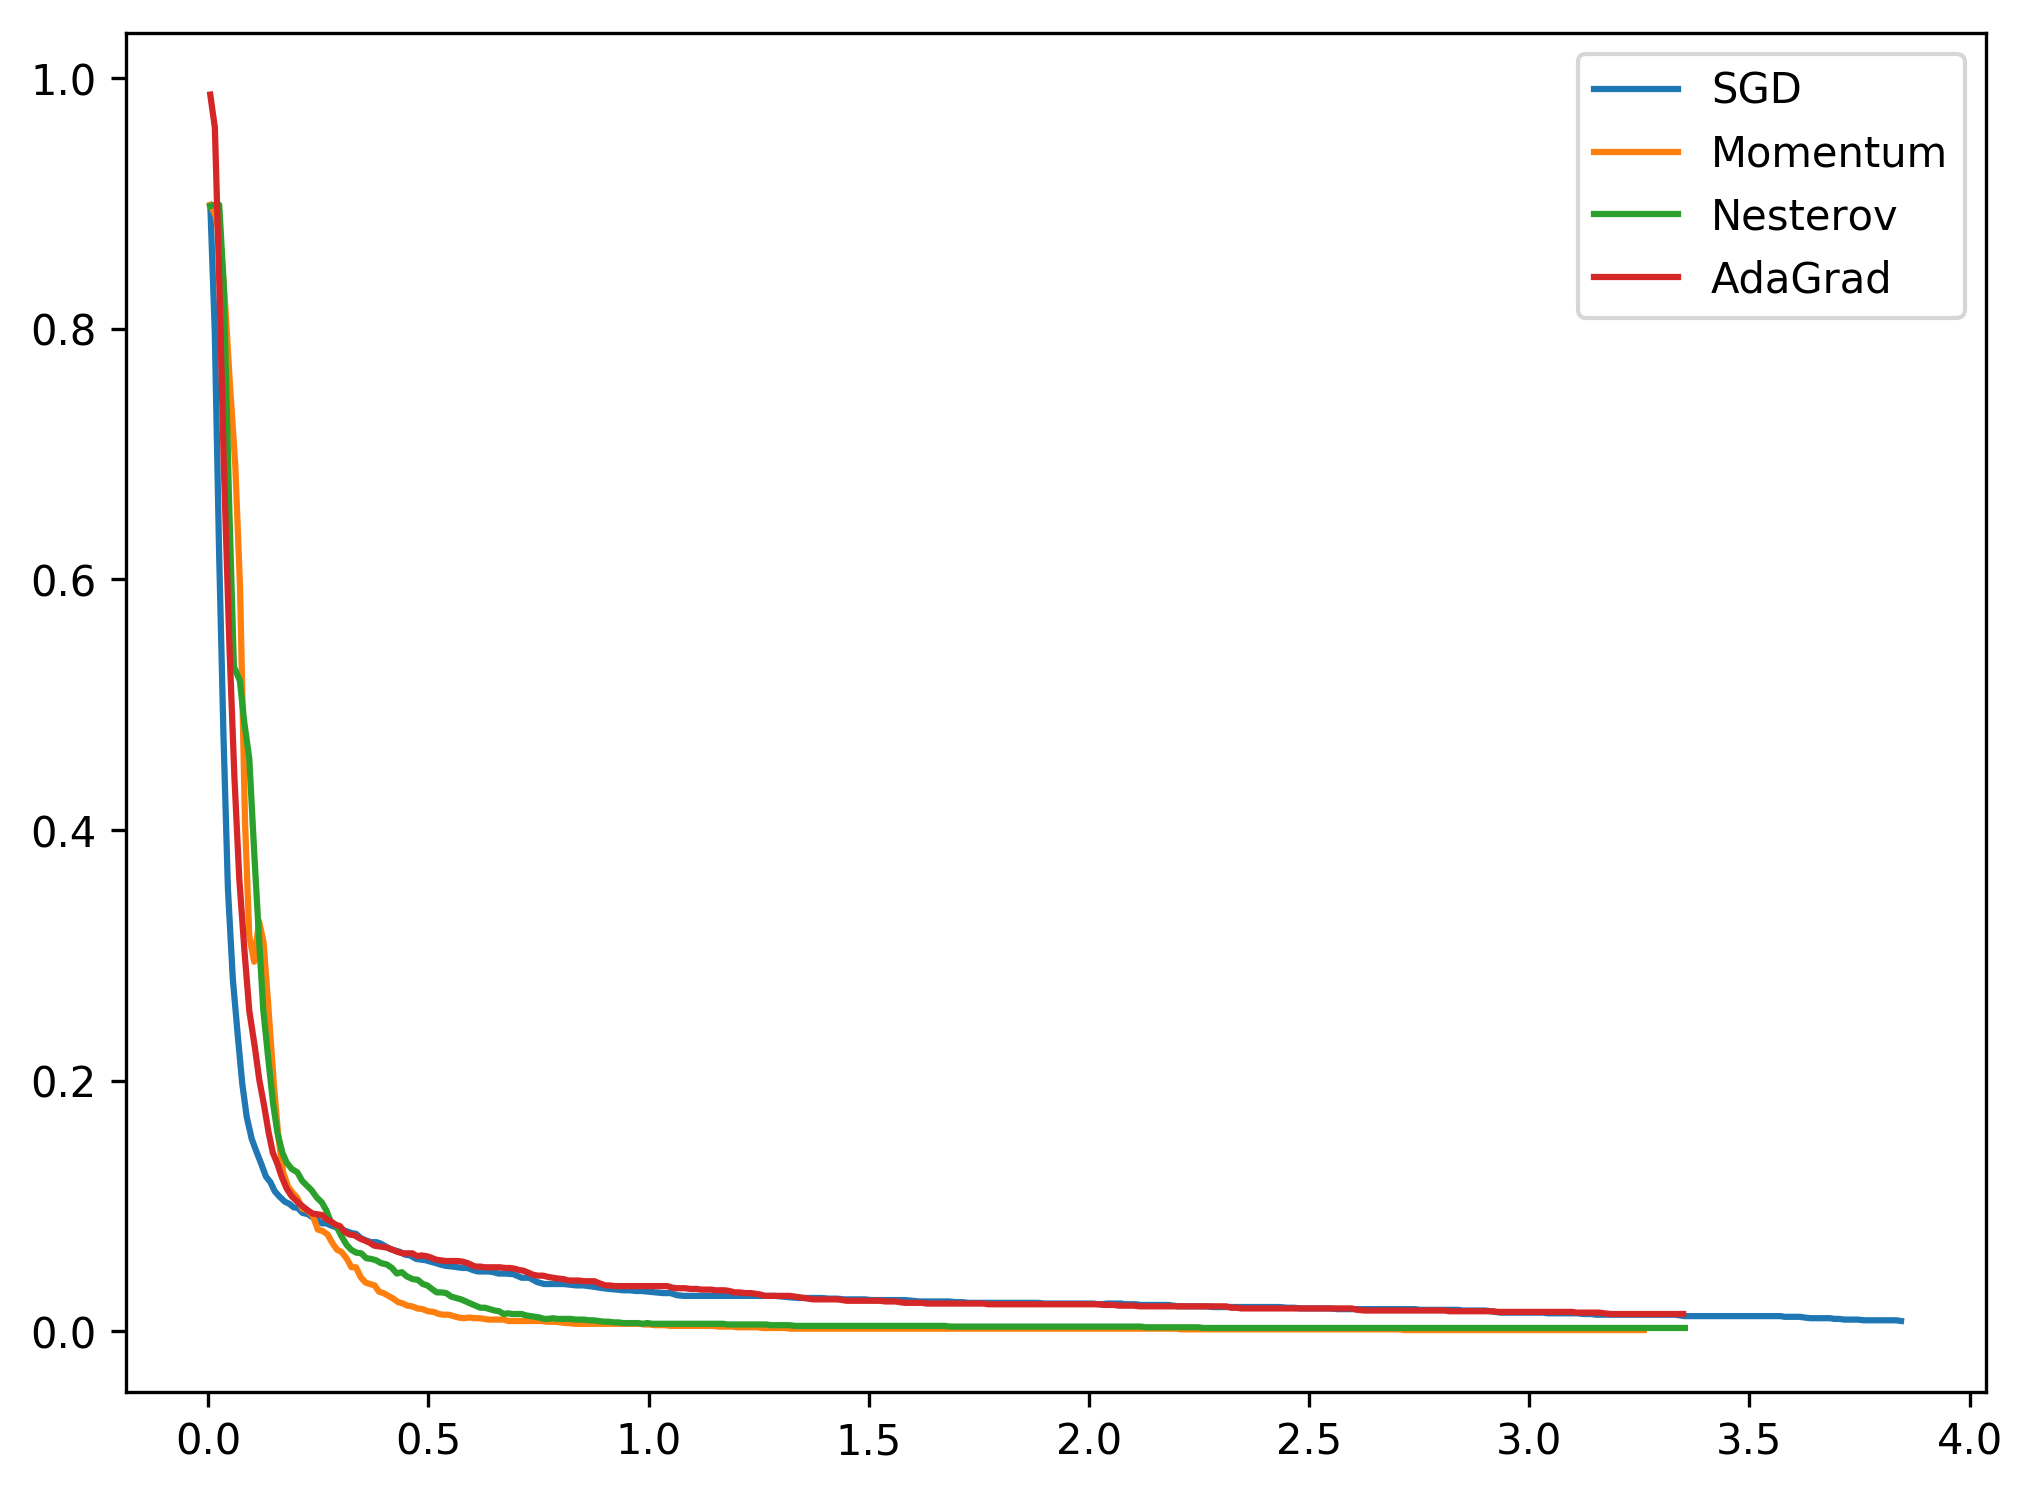

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

errors_sgd = pd.DataFrame(errors_sgd)
errors_momentum = pd.DataFrame(errors_momentum)
errors_nesterov = pd.DataFrame(errors_nesterov)
errors_adagrad = pd.DataFrame(errors_adagrad)

plt.figure(num=None, figsize=(8, 6), dpi=300)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="Momentum")
plt.plot(errors_nesterov['elapsed'],
         errors_nesterov['error'],
         label="Nesterov")
plt.plot(errors_adagrad['elapsed'],
         errors_adagrad['error'],
         label="AdaGrad")

plt.legend()

## RMSprob

In [39]:
from time import time

num_epoch = 300
learning_rate = 0.01

# 현재 gradient 와 누적 gradient 를 합산하여
decay = 0.005

errors_rmsprob = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))

dw1 = 0
dw2 = 0

dw1_cache = 0
dw2_cache = 0

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_rmsprob.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    dw2 = a1.T.dot(d2)
    dw2_cache = decay * dw2_cache + (1 - decay) * (dw2 ** 2)
    w2 = w2 - learning_rate * dw2 / np.sqrt(dw2_cache + 0.000001) # 0 은 나눌 수 없기 때문에 0.000001 을 더해준다.

    dw1 = X.T.dot(d1)
    dw1_cache = decay * dw1_cache + (1 - decay) * (dw1 ** 2)
    w1 = w1 - learning_rate * dw1 / np.sqrt(dw1_cache + 0.000001)

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.81525
 30 error = 0.05120
 60 error = 0.01948
 90 error = 0.01892
120 error = 0.01503
150 error = 0.01503
180 error = 0.01113
210 error = 0.00946
240 error = 0.00612
270 error = 0.00556
----------------------------------------
299 error = 0.00111


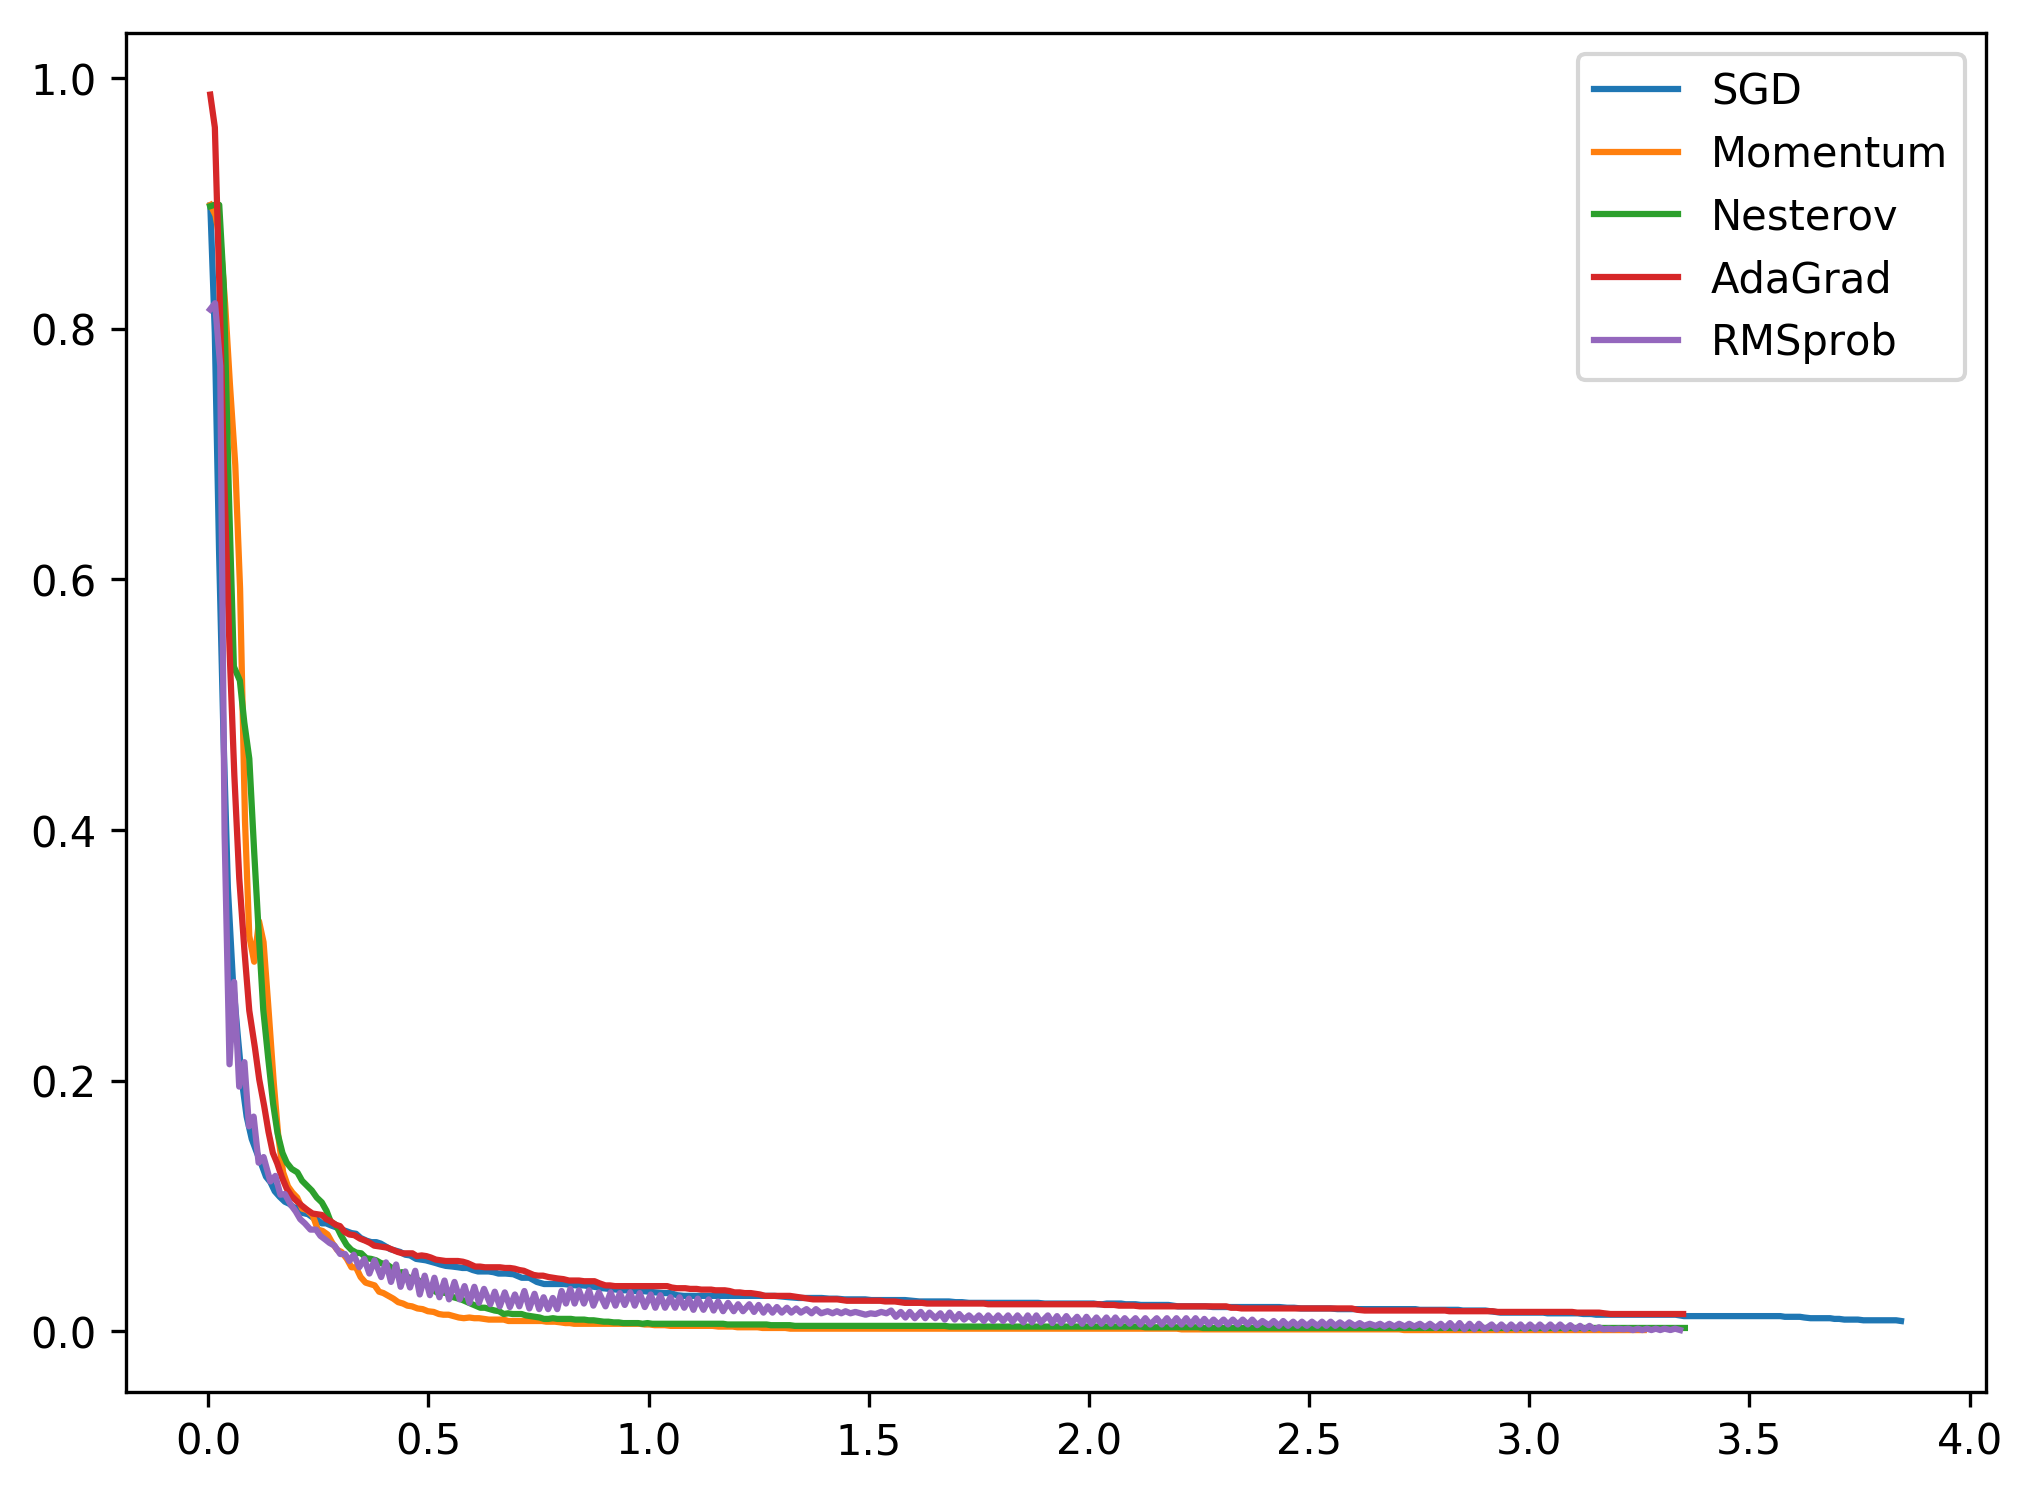

In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

errors_sgd = pd.DataFrame(errors_sgd)
errors_momentum = pd.DataFrame(errors_momentum)
errors_nesterov = pd.DataFrame(errors_nesterov)
errors_adagrad = pd.DataFrame(errors_adagrad)
errors_rmsprob = pd.DataFrame(errors_rmsprob)

plt.figure(num=None, figsize=(8, 6), dpi=300)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="Momentum")
plt.plot(errors_nesterov['elapsed'],
         errors_nesterov['error'],
         label="Nesterov")
plt.plot(errors_adagrad['elapsed'],
         errors_adagrad['error'],
         label="AdaGrad")
plt.plot(errors_rmsprob['elapsed'],
         errors_rmsprob['error'],
         label="RMSprob")

plt.legend()

## Adam

In [44]:
from time import time

num_epoch = 300
learning_rate = 0.03

beta1 = 0.9
beta2 = 0.99

errors_adam = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))

dw1m = 0
dw1v = 0
dw2m = 0
dw2v = 0

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    y_predict = np.argmax(a2, axis=1)
    error = (y_predict != y).mean()

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        
    errors_adam.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d2 = (a2 - y_hot)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    dw2 = a1.T.dot(d2)
    dw2m = beta1 * dw2m + (1 - beta1) * dw2
    dw2v = beta2 * dw2v + (1 - beta2) * (dw2 ** 2)
    dw2mb = dw2m / (1 - (beta1 ** (1 + epoch)))
    dw2vb = dw2v / (1 - (beta2 ** (1 + epoch)))
    
    w2 = w2 - learning_rate * dw2mb / np.sqrt(dw2vb + 0.000001) # 0 은 나눌 수 없기 때문에 0.000001 을 더해준다.

    dw1 = X.T.dot(d1)
    dw1m = beta1 * dw1m + (1 - beta1) * dw1
    dw1v = beta2 * dw1v + (1 - beta2) * (dw1 ** 2)
    dw1mb = dw1m / (1 - (beta1 ** (1 + epoch)))
    dw1vb = dw1v / (1 - (beta2 ** (1 + epoch)))
    
    w1 = w1 - learning_rate * dw1mb / np.sqrt(dw1vb + 0.000001)

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.87034
 30 error = 0.02838
 60 error = 0.00835
 90 error = 0.00556
120 error = 0.00390
150 error = 0.00278
180 error = 0.00111
210 error = 0.00056
240 error = 0.00056
270 error = 0.00000
----------------------------------------
299 error = 0.00000


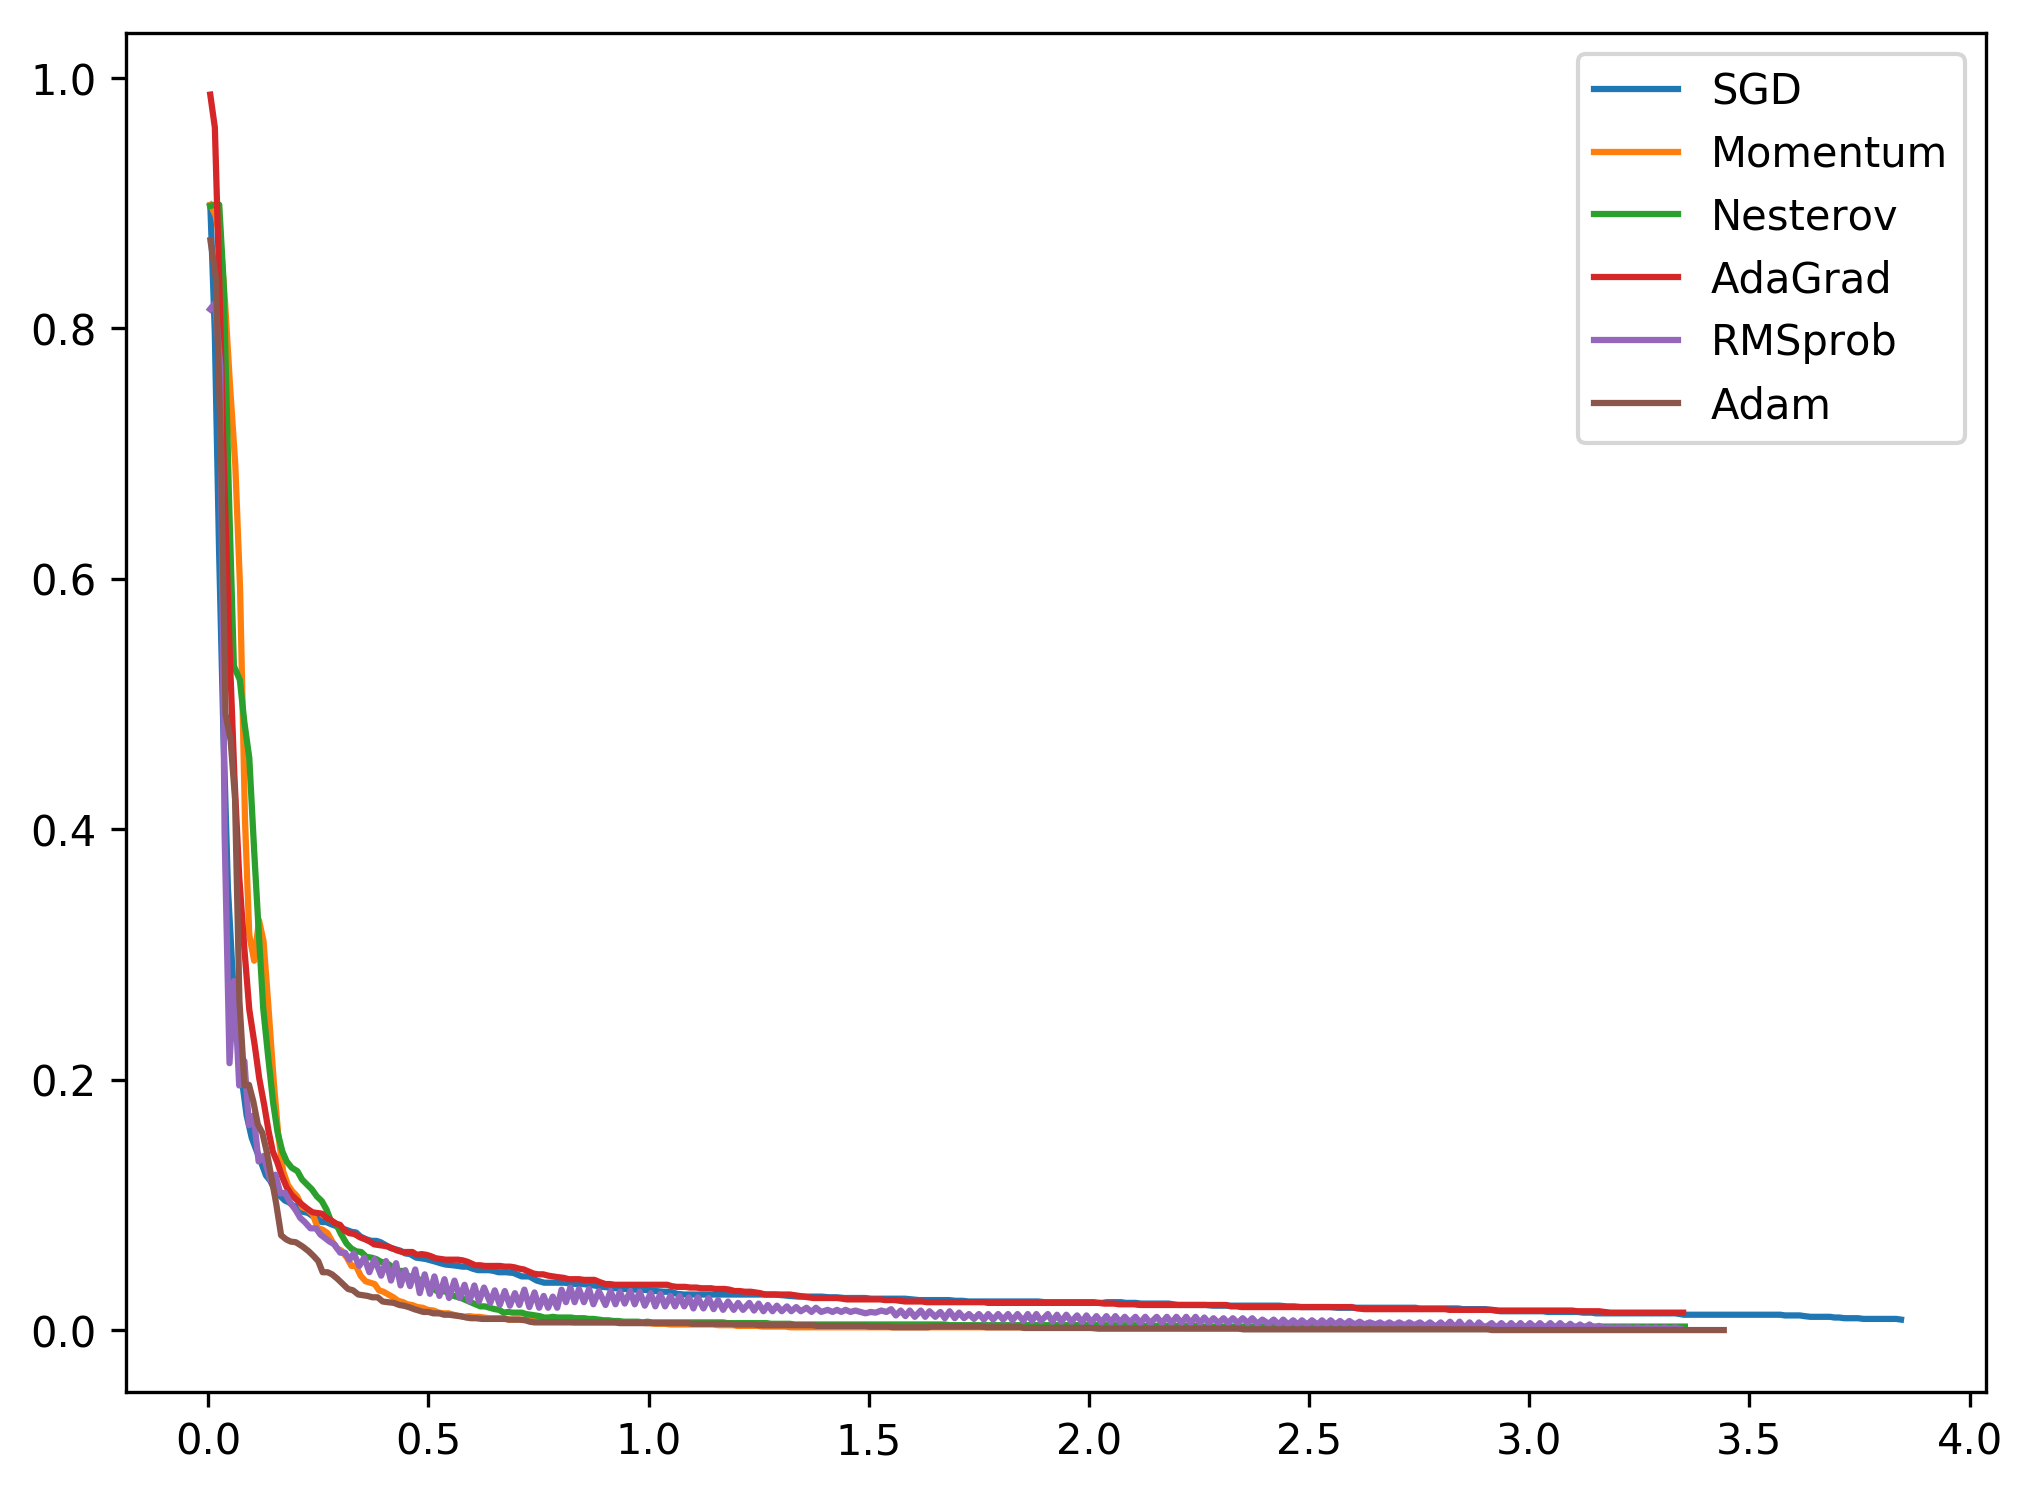

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

errors_sgd = pd.DataFrame(errors_sgd)
errors_momentum = pd.DataFrame(errors_momentum)
errors_nesterov = pd.DataFrame(errors_nesterov)
errors_adagrad = pd.DataFrame(errors_adagrad)
errors_rmsprob = pd.DataFrame(errors_rmsprob)
errors_adam = pd.DataFrame(errors_adam)

plt.figure(num=None, figsize=(8, 6), dpi=300)

plt.plot(errors_sgd['elapsed'],
         errors_sgd['error'],
         label="SGD")
plt.plot(errors_momentum['elapsed'],
         errors_momentum['error'],
         label="Momentum")
plt.plot(errors_nesterov['elapsed'],
         errors_nesterov['error'],
         label="Nesterov")
plt.plot(errors_adagrad['elapsed'],
         errors_adagrad['error'],
         label="AdaGrad")
plt.plot(errors_rmsprob['elapsed'],
         errors_rmsprob['error'],
         label="RMSprob")
plt.plot(errors_adam['elapsed'],
         errors_adam['error'],
         label="Adam")

plt.legend()

## 참고할 페이지

- https://keras.io/optimizers/